In [39]:
import os
import os.path as osp
import mmcv
import mmdet
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob
os.chdir('/home/damon/Github/mmlab/mmdetection/')
%load_ext autoreload
%autoreload 2
sys.path.append('/home/damon/detorch/')
from visualization_utils import *
from debug_utils import *
from multiprocessing import Pool

swap = lambda b: np.stack([b[:, 1], b[:, 0], b[:, 3], b[:, 2]], 1)
def draw_bb(img, boxes):
    # xywh
    b = np.copy(boxes)
    return draw_bounding_boxes_on_image_array(img, boxes=swap(b))

ImportError: cannot import name 'COCO' from 'pycocotools' (/home/damon/.conda/envs/mmlab/lib/python3.7/site-packages/pycocotools-2.0.0-py3.7-linux-x86_64.egg/pycocotools/__init__.py)

In [15]:
volatile = '/home/damon/volatile/VisDrone2019-VID/'
# volatile = '/home/damon/DATASETS/Drone2019/VisDrone2019-DET/'
train_mode = 'VisDrone2018-VID-train'
val_mode = 'VisDrone2018-VID-val'
test_mode = 'VisDrone2018-VID-test-challenge'
volatile_train = osp.join(volatile, train_mode)
volatile_val = osp.join(volatile, val_mode)

train_seq = osp.join(volatile_train, 'sequences')
train_ann = osp.join(volatile_train, 'annotations')
val_seq = osp.join(volatile_val, 'sequences')
val_ann = osp.join(volatile_val, 'annotations')

# validate json

similar to still images

In [40]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import json

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


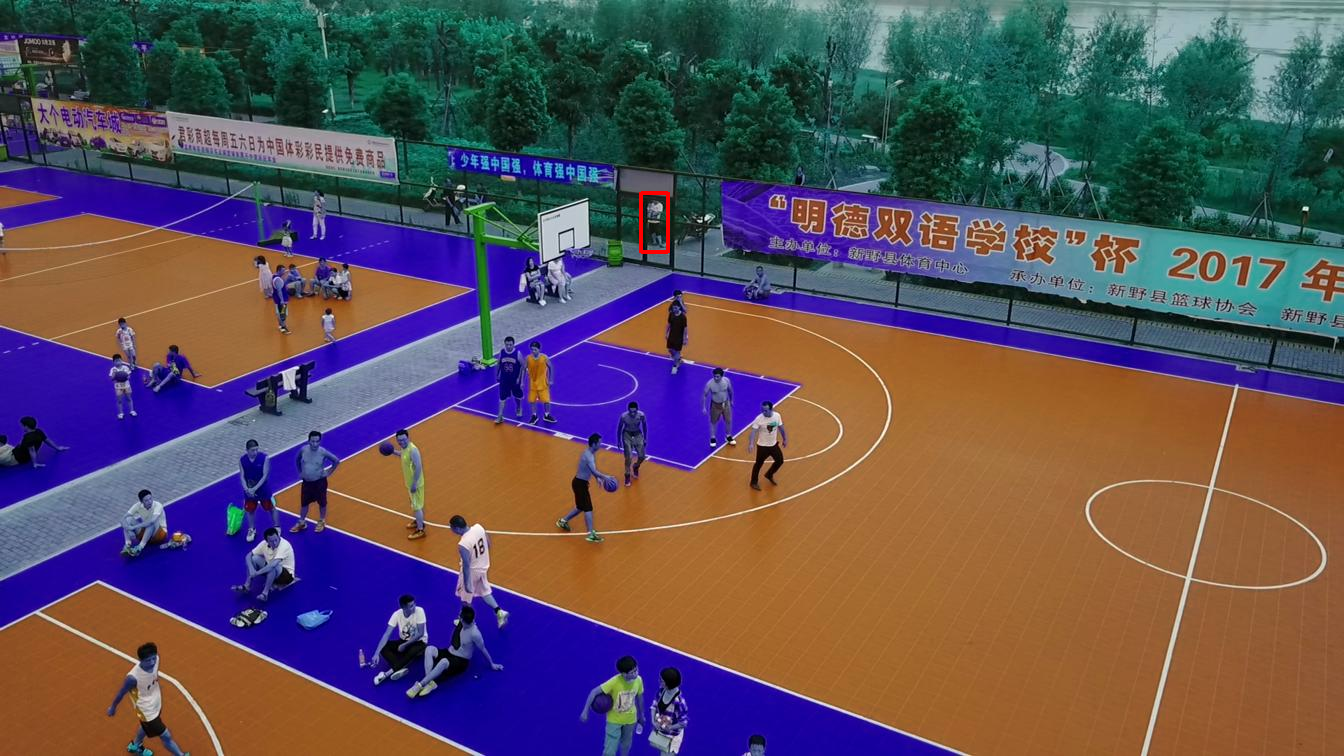

In [53]:
cocoGt = COCO('/home/damon/volatile/VisDrone2019-VID/VisDrone2018-VID-val/annotations_val.json')
j = '/home/damon/volatile/VisDrone2019-VID/VisDrone2018-VID-val/annotations_val.json'
with open(j, 'r') as f:
    j = json.load(f)
j_images = j['images']
j_anno = j['annotations']

ind = np.random.randint(0, len(j_images))
anno = j_anno[ind]
imginfo = [v for v in j_images if v['id'] == anno['image_id']][0]

img = osp.join(volatile_val, imginfo['file_name'])
bbox = anno['bbox']
bbox = np.asarray(bbox, np.int32)[None, :]
bbox[:, 2:] += bbox[:, :2]
ret = draw_bb(mmcv.imread(img), bbox)
visualize_image_array(ret)

In [57]:
img

{'license': 4,
 'file_name': 'sequences/uav0000086_00000_v/0000256.jpg',
 'height': 756,
 'width': 1344,
 'id': 37082681}

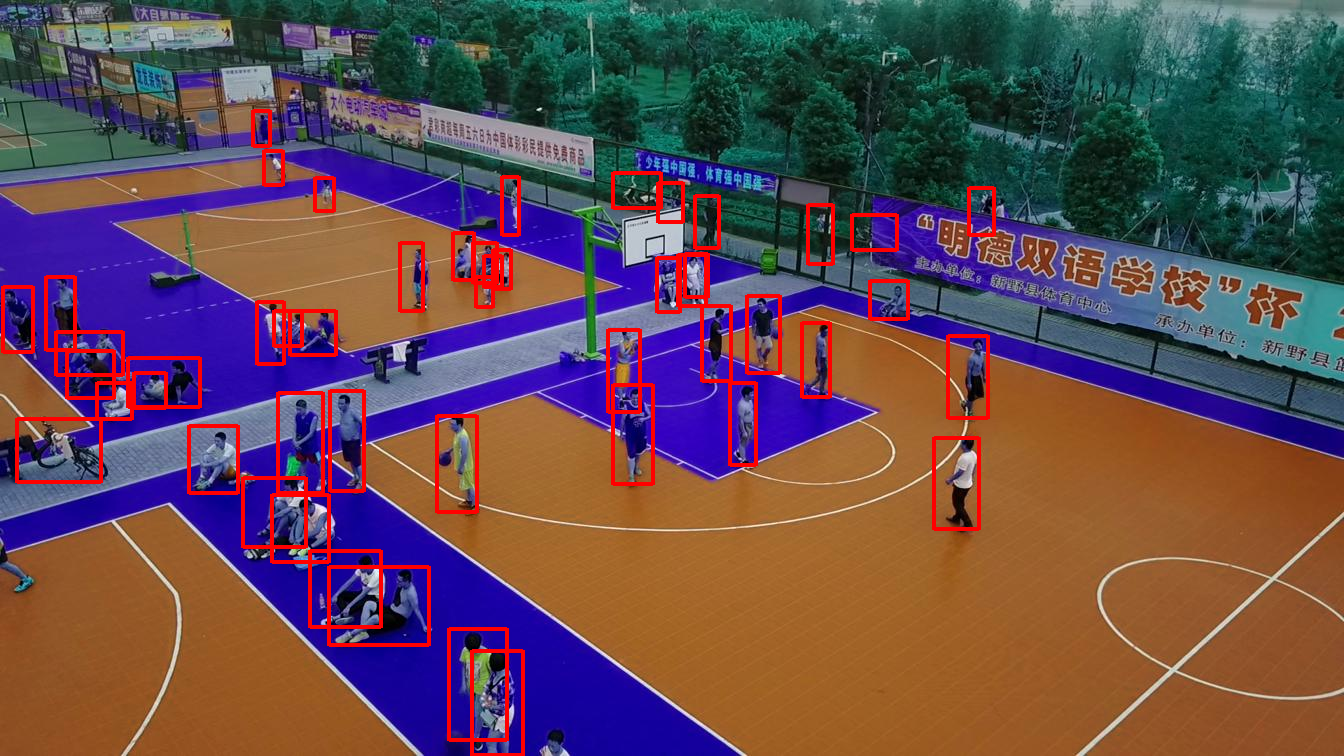

In [65]:
# aggregate
ind = np.random.randint(0, 400)
img = j_images[ind]

annoinfo = [v for v in j_anno if v['image_id'] == img['id']]
box = [v['bbox'] for v in annoinfo]
box = np.asarray(box, np.int32)
box[:, 2:] += box[:, :2]
img = osp.join(volatile_val, img['file_name'])
ret = draw_bb(mmcv.imread(img), box)
visualize_image_array(ret)